# Analysis of the NYC flights dataset for 2013

In this notebook notebook, we're going to explore the NYC flights dataset and see if we can find interesting patterns.

<img src='Newark.jpg'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# Loading the data
df = pd.read_csv('flights.csv')

In [3]:
# Get the dimensions of the dataset
df.shape

(336776, 19)

In [4]:
# Column names
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [5]:
# Datatypes of columns
df.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [6]:
# Preview of what we're working with
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [7]:
# Function for creating datetime columns from time columns
def convert_to_dt(row):
    date = '%s%s%s' % (str(row['year']), '%02d' % row['month'], '%02d' % row['day'])
    dep_time_dt = '%04d' % row['dep_time'] if row['dep_time'] < 2400 else '0000'
    sched_dep_time_dt = '%04d' % row['sched_dep_time'] if row['sched_dep_time'] < 2400 else '0000'
    arr_time_dt = '%04d' % row['arr_time'] if row['arr_time'] < 2400 else '0000'
    sched_arr_time_dt = '%04d' % row['sched_arr_time'] if row['sched_arr_time'] < 2400 else '0000'
    
    dep_time_dt = datetime.datetime.strptime(date + dep_time_dt, '%Y%m%d%H%M')
    sched_dep_time_dt = datetime.datetime.strptime(date + sched_dep_time_dt, '%Y%m%d%H%M')
    arr_time_dt = datetime.datetime.strptime(date + arr_time_dt, '%Y%m%d%H%M')
    sched_arr_time_dt = datetime.datetime.strptime(date + sched_arr_time_dt, '%Y%m%d%H%M')
    
    # Adjustment for the overnight flights
    if dep_time_dt > arr_time_dt:
        arr_time_dt += datetime.timedelta(days=1)
    if sched_dep_time_dt > sched_arr_time_dt:
        sched_arr_time_dt += datetime.timedelta(days=1)
    return pd.Series([dep_time_dt, sched_dep_time_dt, arr_time_dt, sched_arr_time_dt])

In [8]:
df[['dep_time_dt', 'sched_dep_time_dt', 'arr_time_dt', 'sched_arr_time_dt']] = df.apply(convert_to_dt, axis=1)

In [9]:
# Visual check of the result
df.loc[0:5, ['dep_time', 'dep_time_dt', 
             'sched_dep_time', 'sched_dep_time_dt', 
             'arr_time', 'arr_time_dt', 
             'sched_arr_time', 'sched_arr_time_dt']]

,dep_time,dep_time_dt,sched_dep_time,sched_dep_time_dt,arr_time,arr_time_dt,sched_arr_time,sched_arr_time_dt
0,517.0,2013-01-01 05:17:00,515,2013-01-01 05:15:00,830.0,2013-01-01 08:30:00,819,2013-01-01 08:19:00
1,533.0,2013-01-01 05:33:00,529,2013-01-01 05:29:00,850.0,2013-01-01 08:50:00,830,2013-01-01 08:30:00
2,542.0,2013-01-01 05:42:00,540,2013-01-01 05:40:00,923.0,2013-01-01 09:23:00,850,2013-01-01 08:50:00
3,544.0,2013-01-01 05:44:00,545,2013-01-01 05:45:00,1004.0,2013-01-01 10:04:00,1022,2013-01-01 10:22:00
4,554.0,2013-01-01 05:54:00,600,2013-01-01 06:00:00,812.0,2013-01-01 08:12:00,837,2013-01-01 08:37:00
5,554.0,2013-01-01 05:54:00,558,2013-01-01 05:58:00,740.0,2013-01-01 07:40:00,728,2013-01-01 07:28:00


In [10]:
# To make sure that the arrival time > departure time
df.query('dep_time_dt > arr_time_dt')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,dep_time_dt,sched_dep_time_dt,arr_time_dt,sched_arr_time_dt


In [11]:
# Visual check to see if dates are adjusted for overnight flights
df.query('dep_time > 2330')[['dep_time', 'dep_time_dt', 
                             'sched_dep_time', 'sched_dep_time_dt', 
                             'arr_time', 'arr_time_dt', 
                             'sched_arr_time', 'sched_arr_time_dt']].head()

,dep_time,dep_time_dt,sched_dep_time,sched_dep_time_dt,arr_time,arr_time_dt,sched_arr_time,sched_arr_time_dt
834,2343.0,2013-01-01 23:43:00,1724,2013-01-01 17:24:00,314.0,2013-01-02 03:14:00,1938,2013-01-01 19:38:00
835,2353.0,2013-01-01 23:53:00,2359,2013-01-01 23:59:00,425.0,2013-01-02 04:25:00,445,2013-01-02 04:45:00
836,2353.0,2013-01-01 23:53:00,2359,2013-01-01 23:59:00,418.0,2013-01-02 04:18:00,442,2013-01-02 04:42:00
837,2356.0,2013-01-01 23:56:00,2359,2013-01-01 23:59:00,425.0,2013-01-02 04:25:00,437,2013-01-02 04:37:00
1772,2334.0,2013-01-02 23:34:00,2129,2013-01-02 21:29:00,33.0,2013-01-03 00:33:00,2242,2013-01-02 22:42:00


In [12]:
# The percentage of non null data for each column
df.describe().loc['count'] / df.shape[0]

year              1.000000
month             1.000000
day               1.000000
dep_time          0.975488
sched_dep_time    1.000000
dep_delay         0.975488
arr_time          0.974128
sched_arr_time    1.000000
arr_delay         0.971999
flight            1.000000
air_time          0.971999
distance          1.000000
hour              1.000000
minute            1.000000
Name: count, dtype: float64

In [13]:
# The percentage of data that's left when considering only complete rows
df.dropna().describe().loc['count'] / df.shape[0]

year              0.971999
month             0.971999
day               0.971999
dep_time          0.971999
sched_dep_time    0.971999
dep_delay         0.971999
arr_time          0.971999
sched_arr_time    0.971999
arr_delay         0.971999
flight            0.971999
air_time          0.971999
distance          0.971999
hour              0.971999
minute            0.971999
Name: count, dtype: float64

Since less than 3% of the data is lost when considering only complete rows we do not consider imputation techniques for missing data.

In [14]:
# Keeping only complete records
dfc = df.dropna()

In [17]:
# Finding out the most frequent flight
busiest_flight = dfc.groupby('flight')['day'].count().idxmax()
dfc.loc[dfc['flight'] == busiest_flight, ['flight', 'carrier', 'origin', 'dest']].drop_duplicates()

,flight,carrier,origin,dest
379,15,UA,EWR,HNL
590,15,B6,JFK,FLL
27109,15,AS,EWR,SEA
27232,15,B6,JFK,SFO
224929,15,US,JFK,PHX


It appears that the flights do not correspond to a particular route. 

In [18]:
# Finding out the most frequent flight (take 2)
dfc.assign(
    org_dep=dfc['origin']+'_'+dfc['dest']).groupby('org_dep')['day'].count().sort_values(ascending=False).head()

org_dep
JFK_LAX    11159
LGA_ATL    10041
LGA_ORD     8507
JFK_SFO     8109
LGA_CLT     5961
Name: day, dtype: int64

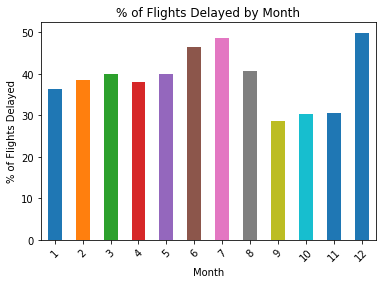

In [19]:
# Percentage of all flights delayed by month
dfc.assign(delayed=dfc['dep_delay'] > 0).groupby(dfc['dep_time_dt'].dt.month).apply(
    lambda x: x['delayed'].sum()/len(x) * 100).plot.bar(rot=45)
plt.title('% of Flights Delayed by Month')
plt.xlabel('Month')
plt.ylabel('% of Flights Delayed')
plt.show()

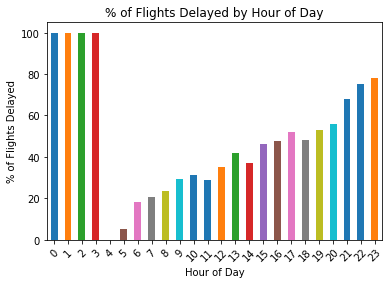

In [20]:
# Percentage of all flights delayed by hour
dfc.assign(delayed=dfc['dep_delay'] > 0).groupby(dfc['dep_time_dt'].dt.hour).apply(
    lambda x: x['delayed'].sum()/len(x) * 100).plot.bar(rot=45)
plt.title('% of Flights Delayed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('% of Flights Delayed')
plt.show()